<a href="https://colab.research.google.com/github/mjiii25/jeonju/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R 실행

https://gist.github.com/jobdiogenes/235620928c84e604c6e56211ccf681f0

In [3]:
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, inherits, isOpen, nullfile, parse,
    warnings




In [4]:
# If ts not available we need to install . put other packages if you need.
packages <- c("googledrive", "googlesheets4")
if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
  install.packages(setdiff(packages, rownames(installed.packages())))  
}

In [5]:
library("googledrive")
library("googlesheets4")


Attaching package: ‘googlesheets4’


The following objects are masked from ‘package:googledrive’:

    request_generate, request_make




In [7]:
# call authentication forcing interactive login and save in cache. 
drive_auth(use_oob = TRUE, cache = TRUE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/auth?client_id=603366585132-dpeg5tt0et3go5of2374d83ifevk5086.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code



Enter authorization code: 4/1AY0e-g4n_EDtK9GNMepvIbNLQ69ZyLI7Vt3FtH77B49hMy_4083dKxXU4M8


In [8]:
# Find Google Sheets anf get the id of the first sheet 
Sheets <- drive_find(type = "spreadsheet")
first_id <- Sheets$id[1]

In [9]:
# reuse token to Sheet Auth. 
sheets_auth(token = drive_token())

Warning message:
“`sheets_auth()` was deprecated in googlesheets4 0.2.0.
Please use `gs4_auth()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [10]:
# show data
sheets_read(first_id)

Warning message:
“`sheets_read()` was deprecated in googlesheets4 0.2.0.
Please use `range_read()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Reading from "gu_usage"

Range "gu_usage"



province,gu,gu_eng,date,count
<chr>,<chr>,<chr>,<dttm>,<dbl>
서울,종로구,Jongno,2020-07-01,85935
서울,중구,Jung,2020-07-01,52417
서울,용산구,Yongsan,2020-07-01,58354
서울,성동구,Seongdong,2020-07-01,106216
서울,광진구,Kwangjin,2020-07-01,125735
서울,동대문구,Dongdaemun,2020-07-01,93487
서울,중랑구,Jungnang,2020-07-01,76841
서울,성북구,Seongbuk,2020-07-01,81364
서울,강북구,Gangbuk,2020-07-01,54503


# **데이터 정리** 

## 데이터 불러오기 + 패키지 실행

In [181]:
pop <- read.csv('(중복)2019_전주시 동별 인구.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
rest <- read.csv('(중복)동별 음식점 및 주점업 사업체수(2018).csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
bicycle <- read.csv('(행정동)12_04_03_E_자전거보관소정보.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
bigstore <- read.csv('(행정동)대규모점포현황_2020.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
cvstore <- read.csv('(행정동)동별 체인화 편의점 + 사업체수 (2018년).csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
univ <- read.csv('(행정동)전주시 대학교.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
region <- read.csv('(행정동)전주시 행정동 면적.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
store <- read.csv('전북 상권정보.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
bus <- read.csv('전주시 버스 정류장.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
park <- read.csv('park.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
scooter <- read.csv('(행정동)PM_210509_0시.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")

library(dplyr)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“invalid input found on input connection '전북 상권정보.csv'”


▼ jjdong : 전주시에 있는 행정동 데이터셋

In [182]:
jjdong <- read.csv('전주 행정동_가나다순.csv', header=TRUE, stringsAsFactors=FALSE, fileEncoding = "euc-kr")
jjdong <- jjdong$행정동
str(jjdong)
head(jjdong)

 chr [1:35] "금암1동" "금암2동" "노송동" "덕진동" "동서학동" "삼천1동" ...


[1] "금암1동"  "금암2동"  "노송동"   "덕진동"   "동서학동" "삼천1동"

## 인구수

In [183]:
str(pop)
head(pop)

'data.frame':	35 obs. of  3 variables:
 $ 구  : chr  "완산구" "완산구" "완산구" "완산구" ...
 $ 동  : chr  "중앙동" "풍남동" "노송동" "완산동" ...
 $ 인구: int  8073 4521 13189 5148 6784 9223 15288 20030 13204 46295 ...


,구,동,인구
,<chr>,<chr>,<int>
1,완산구,중앙동,8073
2,완산구,풍남동,4521
3,완산구,노송동,13189
4,완산구,완산동,5148
5,완산구,동서학동,6784
6,완산구,서서학동,9223


1 동이랑 인구 불러오기

2 "동"을 "행정동"으로 바꾸기

3 행정동을 기준으로 오름차순 정렬하기

▼

In [184]:
pop <- pop[,c(2,3)]
names(pop)[1] <- "행정동"
pop <- arrange(pop, pop$행정동)
head(pop)

,행정동,인구
,<chr>,<int>
1,금암1동,8824
2,금암2동,10714
3,노송동,13189
4,덕진동,21215
5,동산동,30208
6,동서학동,6784


▼ 인구수 데이터에 누락된 동이 있는지 확인해본 결과, pop에 있지 않은 jjdong과 jjdong에 있지 않은 pop의 요소가 각각 하나씩 있음을 알 수 있다. (FALSE로 나타남)

In [185]:
table(pop$행정동 %in% jjdong)
table(jjdong %in% pop$행정동)


FALSE  TRUE 
    1    34 


FALSE  TRUE 
    1    34 

▼ pop에는 jjdong에 없는 '동산동'이 있고 jjdong에는 pop에 없는 '여의동'이 있는 것을 확인할 수 있다.

In [186]:
pop$행정동[pop$행정동 %in% jjdong == FALSE] #jjdong에는 없는 pop의 행정동
jjdong[jjdong %in% pop$행정동 == FALSE] #pop에는 없는 jjdong의 행정동

[1] "동산동"

[1] "여의동"

1 실제로 2019년 8월에 전주시에서 '동산동'을 '여의동'으로 변경했기 때문에 이런 차이가 발생하는 것임. pop의 '동산동'을 '여의동'으로 바꿔준다.

2 정리한 자료를 다시 행정동을 기준으로 오름차순 정렬하면

3 pop이 잘 정리된 것을 확인할 수 있다.

▼ 

In [187]:
pop$행정동[which(pop$행정동 == "동산동")] <- "여의동" ## 19년 8월에 동산동을 여의동으로 변경, https://www.hani.co.kr/arti/area/honam/905848.html?_fr=mt2
pop <- arrange(pop, pop$행정동)
pop

행정동,인구
<chr>,<int>
금암1동,8824
금암2동,10714
노송동,13189
덕진동,21215
동서학동,6784
삼천1동,12799
삼천2동,14447
삼천3동,23323
서서학동,9223


## 음식점수

In [188]:
str(rest)
head(rest)

'data.frame':	35 obs. of  5 variables:
 $ 구     : chr  "완산구" "완산구" "완산구" "완산구" ...
 $ 항목   : chr  "효자5동" "중앙동" "서신동" "중화산2동" ...
 $ 순위   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 값     : int  805 567 560 491 488 378 372 227 219 216 ...
 $ 비율...: num  15.4 10.8 10.7 9.4 9.3 7.2 7.1 4.3 4.2 4.1 ...


,구,항목,순위,값,비율...
,<chr>,<chr>,<int>,<int>,<dbl>
1,완산구,효자5동,1,805,15.4
2,완산구,중앙동,2,567,10.8
3,완산구,서신동,3,560,10.7
4,완산구,중화산2동,4,491,9.4
5,완산구,풍남동,5,488,9.3
6,완산구,효자4동,6,378,7.2


1 rest 데이터 중 동이 나와있는 '항목'과 음식점수가 나와있는 '값'을 추출

2 '항목'과 '값'을 '행정동'과 '음식점수'로 변경

3  행정동을 기준으로 오름차순 정렬

▼ 

In [189]:
rest <- rest[,c(2,4)]
names(rest) <- c("행정동", "음식점수")
rest <- arrange(rest, rest$행정동)
head(rest)

,행정동,음식점수
,<chr>,<int>
1,금암1동,323
2,금암2동,119
3,노송동,193
4,덕진동,468
5,동서학동,67
6,삼천1동,97


▼  pop에서와 마찬가지로 rest에서도 누락된 행정동이 있는지 확인해봤을 때, rest와 jjdong의 행정동이 모두 일치하는 것으로 보아 누락된 행정동은 없다고 볼 수 있다.

In [190]:
table(rest$행정동 %in% jjdong)
table(jjdong %in% rest$행정동)

jjdong[jjdong %in% rest$행정동 == FALSE]


TRUE 
  35 


TRUE 
  35 

character(0)

In [191]:
rest

행정동,음식점수
<chr>,<int>
금암1동,323
금암2동,119
노송동,193
덕진동,468
동서학동,67
삼천1동,97
삼천2동,216
삼천3동,219
서서학동,54


## 자전거 보관대 수

In [192]:
str(bicycle)
head(bicycle)

'data.frame':	179 obs. of  17 variables:
 $ 번호              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자전거보관소명    : chr  "자전거 보관대" "자전거 보관대" "자전거 보관대" "자전거 보관대" ...
 $ 소재지도로명주소  : chr  "전라북도 전주시 덕진구 여암2길 9" "전라북도 전주시 덕진구 송천중앙로 116" "전라북도 전주시 덕진구 송천중앙로162" "전라북도 전주시 덕진구 송천중앙로 153" ...
 $ 소재지지번주소    : chr  "전라북도 전주시 덕진구 반월동 248-32" "전라북도 전주시 덕진구 송천동1가 395-28" "전라북도 전주시 덕진구 송천동1가 113-12" "전라북도 전주시 덕진구 송천동1가 481-4" ...
 $ 행정동            : chr  "조촌동" "송천1동" "송천2동" "송천2동" ...
 $ 위도              : num  35.9 35.9 35.9 35.9 35.9 ...
 $ 경도              : num  127 127 127 127 127 ...
 $ 보관대수          : int  6 7 7 10 10 6 7 7 10 30 ...
 $ 설치연도          : int  NA NA NA NA NA NA NA NA NA NA ...
 $ 설치형태          : chr  "거치형" "휀스형" "거치형" "휀스형" ...
 $ 차양막설치여부    : chr  "N" "Y" "N" "Y" ...
 $ 공기주입기비치여부: chr  "N" "N" "N" "N" ...
 $ 공기주입기유형    : logi  NA NA NA NA NA NA ...
 $ 수리대설치여부    : chr  "N" "N" "N" "N" ...
 $ 관리기관전화번호  : chr  "063-281-2602" "063-281-2603" "063-281-2604" "063-281-2605" ...
 $ 관리기관명        :

,번호,자전거보관소명,소재지도로명주소,소재지지번주소,행정동,위도,경도,보관대수,설치연도,설치형태,차양막설치여부,공기주입기비치여부,공기주입기유형,수리대설치여부,관리기관전화번호,관리기관명,데이터기준일자
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>
1,1,자전거 보관대,전라북도 전주시 덕진구 여암2길 9,전라북도 전주시 덕진구 반월동 248-32,조촌동,35.87,127.1,6,NA,거치형,N,N,NA,N,063-281-2602,전라북도 전주시청 자전거정책과,2020-08-31
2,2,자전거 보관대,전라북도 전주시 덕진구 송천중앙로 116,전라북도 전주시 덕진구 송천동1가 395-28,송천1동,35.86,127.1,7,NA,휀스형,Y,N,NA,N,063-281-2603,전라북도 전주시청 자전거정책과,2020-08-31
3,3,자전거 보관대,전라북도 전주시 덕진구 송천중앙로162,전라북도 전주시 덕진구 송천동1가 113-12,송천2동,35.86,127.1,7,NA,거치형,N,N,NA,N,063-281-2604,전라북도 전주시청 자전거정책과,2020-08-31
4,4,자전거 보관대,전라북도 전주시 덕진구 송천중앙로 153,전라북도 전주시 덕진구 송천동1가 481-4,송천2동,35.86,127.1,10,NA,휀스형,Y,N,NA,N,063-281-2605,전라북도 전주시청 자전거정책과,2020-08-31
5,5,자전거 보관대,전라북도 전주시 덕진구 천마산로 40,전라북도 전주시 덕진구 송천동1가 107-172,송천2동,35.86,127.1,10,NA,휀스형,Y,N,NA,N,063-281-2606,전라북도 전주시청 자전거정책과,2020-08-31
6,6,자전거 보관대,전라북도 전주시 덕진구 견훤왕궁로 277,전라북도 전주시 덕진구 금암동 1600-6,금암2동,35.84,127.1,6,NA,거치형,N,N,NA,N,063-281-2607,전라북도 전주시청 자전거정책과,2020-08-31


▼  '번호', '행정동', '보관대수'만 뽑아서 다시 bicycle에 저장

In [193]:
bicycle <- bicycle[, c(1,5,8)]
head(bicycle)

,번호,행정동,보관대수
,<int>,<chr>,<int>
1,1,조촌동,6
2,2,송천1동,7
3,3,송천2동,7
4,4,송천2동,10
5,5,송천2동,10
6,6,금암2동,6


▼ dplyr 패키지 이용해서 행정동을 기준으로 그룹화하고, 그 안에서 행정동별 자전거보관대의 수를 합친 결과를 출력한다.

In [194]:
bicycle <- bicycle %>% group_by(행정동) %>% summarise(자전거보관대수 = sum(보관대수))
head(bicycle)

행정동,자전거보관대수
<chr>,<int>
금암1동,253
금암2동,20
노송동,138
덕진동,237
동서학동,7
삼천2동,21


1 bicycle을 데이터프레임으로 바꿔주고

2 행정동을 기준으로 오름차순 정렬

▼ 

In [195]:
bicycle <- as.data.frame(bicycle)
bicycle <- arrange(bicycle, bicycle$행정동)
bicycle

행정동,자전거보관대수
<chr>,<int>
금암1동,253
금암2동,20
노송동,138
덕진동,237
동서학동,7
삼천2동,21
삼천3동,62
서서학동,7
서신동,126


▼ bicycle에서 누락된 행정동은 '삼천1동', '여의동', '우아1동', '중화산1동', '혁신동', '호성동' 총 6개!

In [196]:
table(bicycle$행정동 %in% jjdong)
table(jjdong %in% bicycle$행정동)


jjdong[jjdong %in% bicycle$행정동 == FALSE]


TRUE 
  29 


FALSE  TRUE 
    6    29 

[1] "삼천1동"   "여의동"    "우아1동"   "중화산1동" "혁신동"    "호성동"

▼ jjdong[jjdong %in% bicycle$행정동 == FALSE] 을 '행정동'으로, 이에 해당하는 자전거보관대 개수의 중앙값을 '자전거보관대수'로 저장하는 데이터프레임 add를 만든다.

** NA로 설정하면 상관분석을 할 수가 없어서 일단 중앙값으로 설정해놓음

In [197]:
add <- data.frame(행정동 = jjdong[jjdong %in% bicycle$행정동 == FALSE], 
                     자전거보관대수 = rep(median(bicycle$자전거보관대수), times = length(jjdong[jjdong %in% bicycle$행정동 == FALSE])))
head(add)

,행정동,자전거보관대수
,<chr>,<int>
1,삼천1동,60
2,여의동,60
3,우아1동,60
4,중화산1동,60
5,혁신동,60
6,호성동,60


1 bicycle과 add를 행을 기준으로 합쳐서 다시 bicycle에 저장

2 행정동을 기준으로 오름차순 정렬

▼

In [198]:
bicycle <- rbind(bicycle, add)
bicycle <- arrange(bicycle, bicycle$행정동)
bicycle

행정동,자전거보관대수
<chr>,<int>
금암1동,253
금암2동,20
노송동,138
덕진동,237
동서학동,7
삼천1동,60
삼천2동,21
삼천3동,62
서서학동,7


## 대규모점포 수

In [199]:
str(bigstore)
head(bigstore)

'data.frame':	43 obs. of  5 variables:
 $ 분류   : chr  "대규모점포" "대규모점포" "대규모점포" "대규모점포" ...
 $ store  : chr  "롯데백화점 전주점" "E-마트" "홈플러스 완산점" "홈플러스 전주점" ...
 $ address: chr  "전주시 완산구 온고을로 2" "전주시 완산구 당산로 111" "전주시 완산구 기린대로 170" "전주시 덕진구 백제대로 771" ...
 $ 행정동 : chr  "서신동" "서신동" "노송동" "우아1동" ...
 $ 면적   : int  28179 6571 13121 8471 22657 10430 10387 6115 7721 21317 ...


,분류,store,address,행정동,면적
,<chr>,<chr>,<chr>,<chr>,<int>
1,대규모점포,롯데백화점 전주점,전주시 완산구 온고을로 2,서신동,28179
2,대규모점포,E-마트,전주시 완산구 당산로 111,서신동,6571
3,대규모점포,홈플러스 완산점,전주시 완산구 기린대로 170,노송동,13121
4,대규모점포,홈플러스 전주점,전주시 덕진구 백제대로 771,우아1동,8471
5,대규모점포,홈플러스 효자점,전주시 완산구 용머리로 31,효자3동,22657
6,대규모점포,롯데마트 전주점,전주시 완산구 우전로 240,효자4동,10430


In [200]:
bigstore <- bigstore[,c(2,4,5)]
bigstore$count <- rep(1,nrow(bigstore))
head(bigstore)

,store,행정동,면적,count
,<chr>,<chr>,<int>,<dbl>
1,롯데백화점 전주점,서신동,28179,1
2,E-마트,서신동,6571,1
3,홈플러스 완산점,노송동,13121,1
4,홈플러스 전주점,우아1동,8471,1
5,홈플러스 효자점,효자3동,22657,1
6,롯데마트 전주점,효자4동,10430,1


In [201]:
bigstore <- bigstore %>% group_by(행정동) %>% summarise(대규모점포수 = sum(count))
bigstore <- as.data.frame(bigstore)
bigstore <- arrange(bigstore, bigstore$행정동)
head(bigstore)

,행정동,대규모점포수
,<chr>,<dbl>
1,금암1동,1
2,노송동,2
3,덕진동,1
4,삼천3동,2
5,서신동,4
6,송천1동,3


In [202]:
table(bigstore$행정동 %in% jjdong)
table(jjdong %in% bigstore$행정동)


jjdong[jjdong %in% bigstore$행정동 == FALSE]


TRUE 
  19 


FALSE  TRUE 
   16    19 

[1] "금암2동"   "동서학동"  "삼천1동"   "삼천2동"   "서서학동"  "송천2동"  
 [7] "완산동"    "우아2동"   "조촌동"    "중화산2동" "진북동"    "팔복동"   
[13] "평화1동"   "혁신동"    "효자2동"   "효자5동"

In [203]:
add <- data.frame(행정동 = jjdong[jjdong %in% bigstore$행정동 == FALSE], 
                  대규모점포수 = rep(0, length(jjdong[jjdong %in% bigstore$행정동 == FALSE])))
bigstore <- rbind(bigstore, add)
bigstore <- arrange(bigstore, bigstore$행정동)
bigstore

행정동,대규모점포수
<chr>,<dbl>
금암1동,1
금암2동,0
노송동,2
덕진동,1
동서학동,0
삼천1동,0
삼천2동,0
삼천3동,2
서서학동,0


## 편의점 수

In [204]:
str(cvstore)
head(cvstore)

'data.frame':	31 obs. of  5 variables:
 $ 구         : chr  "완산구" "완산구" "완산구" "완산구" ...
 $ 동         : chr  "효자5동" "효자4동" "서신동" "평화2동" ...
 $ 순위.구.내.: int  1 2 3 4 5 6 7 8 9 10 ...
 $ 편의점수   : int  60 36 31 21 20 19 17 16 13 9 ...
 $ 비율...    : num  21.7 13 11.2 7.6 7.2 6.9 6.2 5.8 4.7 3.3 ...


,구,동,순위.구.내.,편의점수,비율...
,<chr>,<chr>,<int>,<int>,<dbl>
1,완산구,효자5동,1,60,21.7
2,완산구,효자4동,2,36,13.0
3,완산구,서신동,3,31,11.2
4,완산구,평화2동,4,21,7.6
5,완산구,중화산2동,5,20,7.2
6,완산구,중화산1동,6,19,6.9


In [205]:
cvstore <- cvstore[,c(2,4)]
names(cvstore)[1] <- "행정동"
cvstore <- arrange(cvstore, cvstore$행정동)
head(cvstore)

,행정동,편의점수
,<chr>,<int>
1,금암1동,25
2,금암2동,8
3,노송동,5
4,덕진동,29
5,동서학동,6
6,삼천2동,9


In [206]:
table(cvstore$행정동 %in% jjdong)
table(jjdong %in% cvstore$행정동)

jjdong[jjdong %in% cvstore$행정동 == FALSE] #cvstore에는 없는 jjdong의 행정동


TRUE 
  31 


FALSE  TRUE 
    4    31 

[1] "삼천1동"  "서서학동" "완산동"   "효자1동"

In [207]:
add <- data.frame(행정동 = jjdong[jjdong %in% cvstore$행정동 == FALSE], 
                  편의점수 = rep(median(cvstore$편의점수), length(jjdong[jjdong %in% cvstore$행정동 == FALSE])))
cvstore<- rbind(cvstore, add)
cvstore <- arrange(cvstore, cvstore$행정동)
cvstore

행정동,편의점수
<chr>,<int>
금암1동,25
금암2동,8
노송동,5
덕진동,29
동서학동,6
삼천1동,14
삼천2동,9
삼천3동,13
서서학동,14


## 대학교 수

In [208]:
str(univ)
head(univ)

'data.frame':	7 obs. of  3 variables:
 $ 대학교: chr  "전북대학교 전주캠퍼스" "전주교육대학교" "예수대학교" "전주대학교" ...
 $ 위치  : chr  "전라북도 전주시 덕진구 백제대로 567" "전라북도 전주시 완산구 서학로 50 " "전라북도 전주시 완산구 서원로 383 " "전라북도 전주시 완산구 천잠로 303" ...
 $ 행정동: chr  "덕진동" "동서학동" "중화산1동" "효자4동" ...


,대학교,위치,행정동
,<chr>,<chr>,<chr>
1,전북대학교 전주캠퍼스,전라북도 전주시 덕진구 백제대로 567,덕진동
2,전주교육대학교,전라북도 전주시 완산구 서학로 50,동서학동
3,예수대학교,전라북도 전주시 완산구 서원로 383,중화산1동
4,전주대학교,전라북도 전주시 완산구 천잠로 303,효자4동
5,전주기전대학,전라북도 전주시 완산구 전주천서로 267,중화산1동
6,전주비전대학교,전라북도 전주시 완산구 천잠로 235,효자4동


In [209]:
univ <- univ[,c(1,3)]
univ$count <- rep(1,nrow(univ))
univ

대학교,행정동,count
<chr>,<chr>,<dbl>
전북대학교 전주캠퍼스,덕진동,1
전주교육대학교,동서학동,1
예수대학교,중화산1동,1
전주대학교,효자4동,1
전주기전대학,중화산1동,1
전주비전대학교,효자4동,1
한국농수산대학,효자5동,1


In [210]:
univ <- univ %>% group_by(행정동) %>% summarise(대학교수 = sum(count))
univ <- as.data.frame(univ)
univ <- arrange(univ, univ$행정동)
univ

행정동,대학교수
<chr>,<dbl>
덕진동,1
동서학동,1
중화산1동,2
효자4동,2
효자5동,1


In [211]:
table(univ$행정동 %in% jjdong)
table(jjdong %in% univ$행정동)

jjdong[jjdong %in% univ$행정동 == FALSE] #univ에는 없는 jjdong의 행정동


TRUE 
   5 


FALSE  TRUE 
   30     5 

[1] "금암1동"   "금암2동"   "노송동"    "삼천1동"   "삼천2동"   "삼천3동"  
 [7] "서서학동"  "서신동"    "송천1동"   "송천2동"   "여의동"    "완산동"   
[13] "우아1동"   "우아2동"   "인후1동"   "인후2동"   "인후3동"   "조촌동"   
[19] "중앙동"    "중화산2동" "진북동"    "팔복동"    "평화1동"   "평화2동"  
[25] "풍남동"    "혁신동"    "호성동"    "효자1동"   "효자2동"   "효자3동"

In [212]:
add <- data.frame(행정동 = jjdong[jjdong %in% univ$행정동 == FALSE], 
                  대학교수 = rep(0, length(jjdong[jjdong %in% univ$행정동 == FALSE])))
univ <- rbind(univ, add)
univ <- arrange(univ, univ$행정동)
univ

행정동,대학교수
<chr>,<dbl>
금암1동,0
금암2동,0
노송동,0
덕진동,1
동서학동,1
삼천1동,0
삼천2동,0
삼천3동,0
서서학동,0


## 면적

In [213]:
str(region)
head(region)

'data.frame':	35 obs. of  3 variables:
 $ 구       : chr  "덕진구" "덕진구" "덕진구" "덕진구" ...
 $ 동       : chr  "진북동" "인후1동" "인후2동" "인후3동" ...
 $ 면적.km..: num  1.71 1.29 1.32 1.68 4.78 ...


,구,동,면적.km..
,<chr>,<chr>,<dbl>
1,덕진구,진북동,1.71
2,덕진구,인후1동,1.29
3,덕진구,인후2동,1.32
4,덕진구,인후3동,1.68
5,덕진구,덕진동,4.78
6,덕진구,금암1동,1.25


In [214]:
region <- region[,c(2,3)]
names(region) <- c("행정동", "면적.km")
region <- arrange(region, region$행정동)
region

행정동,면적.km
<chr>,<dbl>
금암1동,1.25
금암2동,1.25
노송동,2.09
덕진동,4.78
동서학동,15.64
삼천1동,1.27
삼천2동,0.95
삼천3동,26.60
서서학동,2.97


In [215]:
table(region$행정동 %in% jjdong)
table(jjdong %in% region$행정동)

region$행정동[region$행정동 %in% jjdong == FALSE] #jjdong에는 없는 region의 행정동 #이름 오류 있는 듯 (송청1동, 품남동)

jjdong[jjdong %in% region$행정동 == FALSE] #region에는 없는 jjdong의 행정동

region


TRUE 
  35 


TRUE 
  35 

character(0)

character(0)

행정동,면적.km
<chr>,<dbl>
금암1동,1.25
금암2동,1.25
노송동,2.09
덕진동,4.78
동서학동,15.64
삼천1동,1.27
삼천2동,0.95
삼천3동,26.60
서서학동,2.97


## 상점개수

In [216]:
str(store)
head(store)

'data.frame':	6503 obs. of  39 variables:
 $ 상가업소번호      : int  20763988 23959893 20776948 23035233 17174374 17174126 17174123 17173996 15501309 28490006 ...
 $ 상호명            : chr  "공덕이발관" "MK디자인건축" "대영타일욕실나라" "코오롱세탁소" ...
 $ 지점명            : chr  "" "" "" "" ...
 $ 상권업종대분류코드: chr  "F" "D" "D" "F" ...
 $ 상권업종대분류명  : chr  "생활서비스" "소매" "소매" "생활서비스" ...
 $ 상권업종중분류코드: chr  "F01" "D07" "D07" "F02" ...
 $ 상권업종중분류명  : chr  "이/미용/건강" "가정/주방/인테리어" "가정/주방/인테리어" "세탁/가사서비스" ...
 $ 상권업종소분류코드: chr  "F01A04" "D07A15" "D07A01" "F02A01" ...
 $ 상권업종소분류명  : chr  "남성미용실" "유리/페인트/철물건축자재" "인테리어/욕실용품/커튼" "세탁소/빨래방" ...
 $ 표준산업분류코드  : chr  "S96111" "G47519" "G47599" "S96912" ...
 $ 표준산업분류명    : chr  "이용업" "페인트, 유리 및 기타 건설자재 소매업" "그외 기타 분류안된 가정용품 소매업" "가정용 세탁업" ...
 $ 시도코드          : int  45 45 45 45 45 45 45 45 45 45 ...
 $ 시도명            : chr  "전라북도" "전라북도" "전라북도" "전라북도" ...
 $ 시군구코드        : int  45210 45140 45111 45130 45190 45710 45111 45113 45113 45140 ...
 $ 시군구명          : chr  "김제시" "익산시" "전주시 완산구" 

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,⋯,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,20763988,공덕이발관,,F,생활서비스,F01,이/미용/건강,F01A04,남성미용실,S96111,⋯,4.521e+24,,전라북도 김제시 공덕면 공덕10길 3,576921,54320,,NA,,126.9,35.89
2,23959893,MK디자인건축,,D,소매,D07,가정/주방/인테리어,D07A15,유리/페인트/철물건축자재,G47519,⋯,4.514e+24,,전라북도 익산시 군익로 443,570080,54658,,NA,,126.9,35.94
3,20776948,대영타일욕실나라,,D,소매,D07,가정/주방/인테리어,D07A01,인테리어/욕실용품/커튼,G47599,⋯,4.511e+24,,전라북도 전주시 완산구 장승배기로 221,560842,55106,,NA,,127.1,35.80
4,23035233,코오롱세탁소,,F,생활서비스,F02,세탁/가사서비스,F02A01,세탁소/빨래방,S96912,⋯,4.513e+24,코오롱컴퓨터세탁,전라북도 군산시 산북로 84,573888,54166,,NA,,126.7,35.96
5,17174374,산리지호텔,,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,,⋯,4.519e+24,남원국민호텔,전라북도 남원시 소리길 124,590090,55795,,NA,,127.4,35.41
6,17174126,휴앤안,,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,⋯,4.571e+24,,전라북도 완주군 삼례읍 후정로 68,565805,55337,,NA,,127.1,35.91


1 store의 변수명 확인

2 필요한 변수들 추출

▼

In [217]:
names(store)
store <- store[, c(1,2,5,7,9,11,13,15,17,19,32,38,39)]
str(store)
head(store)

[1] "상가업소번호"       "상호명"             "지점명"            
 [4] "상권업종대분류코드" "상권업종대분류명"   "상권업종중분류코드"
 [7] "상권업종중분류명"   "상권업종소분류코드" "상권업종소분류명"  
[10] "표준산업분류코드"   "표준산업분류명"     "시도코드"          
[13] "시도명"             "시군구코드"         "시군구명"          
[16] "행정동코드"         "행정동명"           "법정동코드"        
[19] "법정동명"           "지번코드"           "대지구분코드"      
[22] "대지구분명"         "지번본번지"         "지번부번지"        
[25] "지번주소"           "도로명코드"         "도로명"            
[28] "건물본번지"         "건물부번지"         "건물관리번호"      
[31] "건물명"             "도로명주소"         "구우편번호"        
[34] "신우편번호"         "동정보"             "층정보"            
[37] "호정보"             "경도"               "위도"

'data.frame':	6503 obs. of  13 variables:
 $ 상가업소번호    : int  20763988 23959893 20776948 23035233 17174374 17174126 17174123 17173996 15501309 28490006 ...
 $ 상호명          : chr  "공덕이발관" "MK디자인건축" "대영타일욕실나라" "코오롱세탁소" ...
 $ 상권업종대분류명: chr  "생활서비스" "소매" "소매" "생활서비스" ...
 $ 상권업종중분류명: chr  "이/미용/건강" "가정/주방/인테리어" "가정/주방/인테리어" "세탁/가사서비스" ...
 $ 상권업종소분류명: chr  "남성미용실" "유리/페인트/철물건축자재" "인테리어/욕실용품/커튼" "세탁소/빨래방" ...
 $ 표준산업분류명  : chr  "이용업" "페인트, 유리 및 기타 건설자재 소매업" "그외 기타 분류안된 가정용품 소매업" "가정용 세탁업" ...
 $ 시도명          : chr  "전라북도" "전라북도" "전라북도" "전라북도" ...
 $ 시군구명        : chr  "김제시" "익산시" "전주시 완산구" "군산시" ...
 $ 행정동명        : chr  "공덕면" "송학동" "평화2동" "미성동" ...
 $ 법정동명        : chr  "공덕면" "송학동" "평화동1가" "산북동" ...
 $ 도로명주소      : chr  "전라북도 김제시 공덕면 공덕10길 3" "전라북도 익산시 군익로 443" "전라북도 전주시 완산구 장승배기로 221" "전라북도 군산시 산북로 84" ...
 $ 경도            : num  127 127 127 127 127 ...
 $ 위도            : num  35.9 35.9 35.8 36 35.4 ...


,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,20763988,공덕이발관,생활서비스,이/미용/건강,남성미용실,이용업,전라북도,김제시,공덕면,공덕면,전라북도 김제시 공덕면 공덕10길 3,126.9,35.89
2,23959893,MK디자인건축,소매,가정/주방/인테리어,유리/페인트/철물건축자재,"페인트, 유리 및 기타 건설자재 소매업",전라북도,익산시,송학동,송학동,전라북도 익산시 군익로 443,126.9,35.94
3,20776948,대영타일욕실나라,소매,가정/주방/인테리어,인테리어/욕실용품/커튼,그외 기타 분류안된 가정용품 소매업,전라북도,전주시 완산구,평화2동,평화동1가,전라북도 전주시 완산구 장승배기로 221,127.1,35.80
4,23035233,코오롱세탁소,생활서비스,세탁/가사서비스,세탁소/빨래방,가정용 세탁업,전라북도,군산시,미성동,산북동,전라북도 군산시 산북로 84,126.7,35.96
5,17174374,산리지호텔,숙박,호텔/콘도,호텔/콘도,,전라북도,남원시,노암동,신촌동,전라북도 남원시 소리길 124,127.4,35.41
6,17174126,휴앤안,음식,한식,한식/백반/한정식,한식 음식점업,전라북도,완주군,삼례읍,삼례읍,전라북도 완주군 삼례읍 후정로 68,127.1,35.91


▼ store의 시군구명 중 '전주'를 포함하는 데이터 추출

In [218]:
store <- store[grep("전주", store$시군구명), ]
head(store)

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
3,20776948,대영타일욕실나라,소매,가정/주방/인테리어,인테리어/욕실용품/커튼,그외 기타 분류안된 가정용품 소매업,전라북도,전주시 완산구,평화2동,평화동1가,전라북도 전주시 완산구 장승배기로 221,127.1,35.80
7,17174123,솔차니,음식,한식,한식/백반/한정식,한식 음식점업,전라북도,전주시 완산구,삼천3동,삼천동1가,전라북도 전주시 완산구 장승배기로 2-27,127.1,35.79
8,17173996,BBQ치킨,음식,유흥주점,호프/맥주,기타 주점업,전라북도,전주시 덕진구,우아1동,우아동3가,전라북도 전주시 덕진구 견훤로 483,127.2,35.85
9,15501309,금암이동통신,소매,사진/광학/정밀기기소매,핸드폰소매,통신기기 소매업,전라북도,전주시 덕진구,송천1동,송천동2가,전라북도 전주시 덕진구 붓내3길 29,127.1,35.87
19,20743412,서곡해법영어교실,학문/교육,학원-어학,학원-어린이영어,외국어학원,전라북도,전주시 완산구,효자4동,효자동3가,전라북도 전주시 완산구 서곡7길 24,127.1,35.83
20,28494686,대호장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,여관업,전라북도,전주시 덕진구,우아2동,산정동,전라북도 전주시 덕진구 산정1길 32,127.2,35.84


▼ 행정동명을 기준으로 상가의 개수 추출

In [219]:
store <- store %>% group_by(행정동명) %>% summarise(상점개수 = length(상가업소번호))
head(store)

행정동명,상점개수
<chr>,<int>
,1
금암1동,81
금암2동,55
노송동,75
덕진동,114
동산동,62




1 데이터프레임으로 변경

2 행정동을 기준으로 오름차순 정렬

▼

In [220]:
store <- as.data.frame(store)
store <- arrange(store, store$행정동명)
store

행정동명,상점개수
<chr>,<int>
,1
금암1동,81
금암2동,55
노송동,75
덕진동,114
동산동,62
동서학동,18
삼천1동,81
삼천2동,105


▼ 데이터의 열이름을 '행정동', '상점개수'로 변경

In [221]:
names(store) <- c("행정동", "상점개수")
store

행정동,상점개수
<chr>,<int>
,1
금암1동,81
금암2동,55
노송동,75
덕진동,114
동산동,62
동서학동,18
삼천1동,81
삼천2동,105


In [222]:
table(store$행정동 %in% jjdong)
table(jjdong %in% store$행정동)

jjdong[jjdong %in% region$행정동 == FALSE] #store에는 없는 jjdong의 행정동
store$행정동[store$행정동 %in% jjdong == FALSE] #store에는 없는 jjdong의 행정동


FALSE  TRUE 
    2    34 


FALSE  TRUE 
    1    34 

character(0)

[1] ""       "동산동"

In [223]:
which(store$행정동 %in% jjdong == FALSE)
store[which(store$행정동 %in% jjdong == FALSE), ]

[1] 1 6

,행정동,상점개수
,<chr>,<int>
1,,1
6,동산동,62


In [224]:
store$행정동[which(store$행정동 == "동산동")] <- "여의동"
store

행정동,상점개수
<chr>,<int>
,1
금암1동,81
금암2동,55
노송동,75
덕진동,114
여의동,62
동서학동,18
삼천1동,81
삼천2동,105


In [225]:
store <- store %>% group_by(행정동) %>% summarise(상점개수 = sum(상점개수))
store <- as.data.frame(store)
store <- arrange(store, store$행정동)
store <- store[-1,]
store

,행정동,상점개수
,<chr>,<int>
2,금암1동,81
3,금암2동,55
4,노송동,75
5,덕진동,114
6,동서학동,18
7,삼천1동,81
8,삼천2동,105
9,삼천3동,73
10,서서학동,21


## 상권지수

In [110]:
options(digits = 4)
상권지수 <- store$상점개수 / region$면적.km
상권지수

Warning message in store$상점개수/region$면적.km:
“longer object length is not a multiple of shorter object length”


[1]  64.8000  44.0000  35.8852  23.8494   1.1509  63.7795 110.5263   2.7444
 [9]   7.0707 133.0544  19.2067   7.9077   4.0102  17.1717  79.8611   3.1864
[17]  54.2636  46.2121  60.1190   1.4827  84.4444  44.2623  76.1628  39.7661
[25]   6.7751  18.1208  12.2784  51.7073  19.8813   8.5079  82.3529  72.6190
[33] 278.4810   0.1297  12.9187

## 공원수

In [226]:
str(park)
head(park)

'data.frame':	10 obs. of  23 variables:
 $ X            : int  0 1 2 3 4 5 6 7 8 9
 $ dataContent  : logi  NA NA NA NA NA NA ...
 $ dataSid      : int  249 248 247 246 245 244 243 242 241 240
 $ dataTitle    : chr  "추천대공원" "역사도심공원" "이목대공원" "동산구역A" ...
 $ parkAddr     : chr  "전라북도 전주시 덕진구 추천로 82" " " " " " " ...
 $ parkArea     : num  4780 208 264 1405 499 ...
 $ parkFact1    : logi  NA NA NA NA NA NA ...
 $ parkFact2    : logi  NA NA NA NA NA NA ...
 $ parkFact3    : logi  NA NA NA NA NA NA ...
 $ parkFact4    : logi  NA NA NA NA NA NA ...
 $ parkFact5    : logi  NA NA NA NA NA NA ...
 $ parkGubun    : chr  "소공원" "소공원" "소공원" "소공원" ...
 $ parkLoadAddr : chr  "전라북도 전주시 덕진구 팔복동2가 94-4" "전라북도 전주시 완산구 고사동 324-14" "전라북도 전주시 완산구 교동 54-16" "전라북도 전주시 덕진구 여의동2가 601-5" ...
 $ parkLocation : logi  NA NA NA NA NA NA ...
 $ parkNo       : chr  "45113-00111" "45111-00140" "45111-00139" "45113-00110" ...
 $ parkNoticeday: chr  "2019-09-11" "2018-04-30" "2018-12-14" "2017-07-14" ...
 $ parkOrgnm    : c

,X,dataContent,dataSid,dataTitle,parkAddr,parkArea,parkFact1,parkFact2,parkFact3,parkFact4,⋯,parkLocation,parkNo,parkNoticeday,parkOrgnm,parkRegdate,parkSido,parkTel,parkZip,posx,posy
,<int>,<lgl>,<int>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<lgl>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<lgl>,<dbl>,<dbl>
1,0,NA,249,추천대공원,전라북도 전주시 덕진구 추천로 82,4780,NA,NA,NA,NA,⋯,NA,45113-00111,2019-09-11,전라북도 전주시 덕진구청,2020-08-31,NA,063-270-6389,NA,127.1,35.85
2,1,NA,248,역사도심공원,,208,NA,NA,NA,NA,⋯,NA,45111-00140,2018-04-30,전라북도 전주시 덕진구청,2020-08-31,NA,063-220-5438,NA,NA,35.82
3,2,NA,247,이목대공원,,264,NA,NA,NA,NA,⋯,NA,45111-00139,2018-12-14,전라북도 전주시 덕진구청,2020-08-31,NA,063-220-5438,NA,127.2,35.81
4,3,NA,246,동산구역A,,1405,NA,NA,NA,NA,⋯,NA,45113-00110,2017-07-14,전라북도 전주시 덕진구청,2020-08-31,NA,063-270-6389,NA,127.1,35.87
5,4,NA,245,동산구역B,,499,NA,NA,NA,NA,⋯,NA,45113-00109,2017-07-14,전라북도 전주시 덕진구청,2020-08-31,NA,063-270-6389,NA,127.1,35.87
6,5,NA,244,제187호 근린공원,,5153,NA,NA,NA,NA,⋯,NA,45113-00108,2016-09-13,전라북도 전주시 덕진구청,2020-08-31,NA,063-270-6390,NA,127.2,35.83


In [227]:
park <- park[, c(4,6,13)]
park$parkLoadAddr <- c("팔복동", "중앙동", "풍남동", "여의동", "여의동",
                       "우아2동", "송천2동", "송천2동", "우아2동", "팔복동")
park

dataTitle,parkArea,parkLoadAddr
<chr>,<dbl>,<chr>
추천대공원,4780,팔복동
역사도심공원,208,중앙동
이목대공원,264,풍남동
동산구역A,1405,여의동
동산구역B,499,여의동
제187호 근린공원,5153,우아2동
에코시티5호,11157,송천2동
에코시티 1호공원,1500,송천2동
철도178호,36018,우아2동


In [228]:
park <- park %>% group_by(parkLoadAddr) %>% summarise(공원수 = length(dataTitle))
park <- as.data.frame(park)
names(park)[1] <- "행정동"
park <- arrange(park, park$행정동)
park

행정동,공원수
<chr>,<int>
송천2동,2
여의동,2
우아2동,2
중앙동,1
팔복동,2
풍남동,1


In [229]:
table(jjdong %in% park$행정동)

jjdong[jjdong %in% park$행정동 == FALSE] #park에는 없는 jjdong의 행정동


FALSE  TRUE 
   29     6 

[1] "금암1동"   "금암2동"   "노송동"    "덕진동"    "동서학동"  "삼천1동"  
 [7] "삼천2동"   "삼천3동"   "서서학동"  "서신동"    "송천1동"   "완산동"   
[13] "우아1동"   "인후1동"   "인후2동"   "인후3동"   "조촌동"    "중화산1동"
[19] "중화산2동" "진북동"    "평화1동"   "평화2동"   "혁신동"    "호성동"   
[25] "효자1동"   "효자2동"   "효자3동"   "효자4동"   "효자5동"

In [230]:
add <- data.frame(행정동 = jjdong[jjdong %in% park$행정동 == FALSE], 
                     공원수 = rep(0, length(jjdong[jjdong %in% park$행정동 == FALSE])))
park <- rbind(park, add)
park <- arrange(park, park$행정동)
park

행정동,공원수
<chr>,<dbl>
금암1동,0
금암2동,0
노송동,0
덕진동,0
동서학동,0
삼천1동,0
삼천2동,0
삼천3동,0
서서학동,0


## 전동킥보드 사용 수

In [231]:
str(scooter)
head(scooter)

'data.frame':	35 obs. of  6 variables:
 $ gu        : chr  "완산구" "완산구" "완산구" "완산구" ...
 $ dong      : chr  "중앙동" "풍남동" "노송동" "완산동" ...
 $ ssingssing: int  7 1 3 0 2 1 4 6 2 6 ...
 $ alphaca   : int  3 0 0 3 1 4 14 18 7 62 ...
 $ gcooter   : int  0 0 1 0 0 2 2 17 2 20 ...
 $ total     : int  10 1 4 3 3 7 20 41 11 88 ...


,gu,dong,ssingssing,alphaca,gcooter,total
,<chr>,<chr>,<int>,<int>,<int>,<int>
1,완산구,중앙동,7,3,0,10
2,완산구,풍남동,1,0,0,1
3,완산구,노송동,3,0,1,4
4,완산구,완산동,0,3,0,3
5,완산구,동서학동,2,1,0,3
6,완산구,서서학동,1,4,2,7


In [232]:
scooter <- scooter[, c(2,6)]
names(scooter) <- c("행정동", "전동킥보드이용수")
scooter <- arrange(scooter, scooter$행정동)
scooter

행정동,전동킥보드이용수
<chr>,<int>
금암1동,105
금암2동,15
노송동,4
덕진동,73
동서학동,3
삼천1동,17
삼천2동,14
삼천3동,26
서서학동,7


In [233]:
table(jjdong %in% scooter$행정동)
scooter


TRUE 
  35 

행정동,전동킥보드이용수
<chr>,<int>
금암1동,105
금암2동,15
노송동,4
덕진동,73
동서학동,3
삼천1동,17
삼천2동,14
삼천3동,26
서서학동,7


## 버스 정류장 수 ()

## 행정동이 잘 정리되었는지 확인

모든 행정동이 다 동일하다는 것을 확인할 수 있다.



In [234]:
df <- data.frame(pop = pop$행정동, rest = rest$행정동, bicycle = bicycle$행정동, 
                  bigstore = bigstore$행정동, cvstore = cvstore$행정동, univ = univ$행정동, 
                  region = region$행정동, store = store$행정동, park = park$행정동, scooter = scooter$행정동)

df

ERROR: ignored

## 행정동을 기준으로 데이터 정리하기



In [235]:
jj <- merge(pop, rest)
jj <- merge(jj, bicycle)
jj <- merge(jj, bigstore)
jj <- merge(jj, cvstore)
jj <- merge(jj, univ)
jj <- merge(jj, region)
jj <- merge(jj, store)
#jj <- cbind(jj, 상권지수)
jj <- merge(jj, park)
jj <- merge(jj, scooter)

jj

행정동,인구,음식점수,자전거보관대수,대규모점포수,편의점수,대학교수,면적.km,상점개수,공원수,전동킥보드이용수
<chr>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
금암1동,8824,323,253,1,25,0,1.25,81,0,105
금암2동,10714,119,20,0,8,0,1.25,55,0,15
노송동,13189,193,138,2,5,0,2.09,75,0,4
덕진동,21215,468,237,1,29,1,4.78,114,0,73
동서학동,6784,67,7,0,6,1,15.64,18,0,3
삼천1동,12799,97,60,0,14,0,1.27,81,0,17
삼천2동,14447,216,21,0,9,0,0.95,105,0,14
삼천3동,23323,219,62,2,13,0,26.60,73,0,26
서서학동,9223,54,7,0,14,0,2.97,21,0,7


▼ '행정동'은 수치형이 아니라서 분석 불가능하므로 제외

In [236]:
jj <- jj[,-1]
jj

인구,음식점수,자전거보관대수,대규모점포수,편의점수,대학교수,면적.km,상점개수,공원수,전동킥보드이용수
<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>
8824,323,253,1,25,0,1.25,81,0,105
10714,119,20,0,8,0,1.25,55,0,15
13189,193,138,2,5,0,2.09,75,0,4
21215,468,237,1,29,1,4.78,114,0,73
6784,67,7,0,6,1,15.64,18,0,3
12799,97,60,0,14,0,1.27,81,0,17
14447,216,21,0,9,0,0.95,105,0,14
23323,219,62,2,13,0,26.60,73,0,26
9223,54,7,0,14,0,2.97,21,0,7


▼ 전동킥보드 이용수와의 상관분석 결과

편의점수 : 0.63

음식점수 : 0.56

자전거보관대수 : 0.47

인구수 : 0.46

대학교수 : 0.46

대규모점포수 : 0.44


** 일반적으로 0.6이 넘을 경우 상관관계가 양호하다고 봄


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.87 loaded



,인구,음식점수,자전거보관대수,대규모점포수,편의점수,대학교수,면적.km,상점개수,공원수,전동킥보드이용수
인구,1.00,0.48,-0.01,0.46,0.60,0.14,0.20,0.47,-0.06,0.46
음식점수,0.48,1.00,0.33,0.34,0.79,0.24,-0.01,0.47,0.11,0.56
자전거보관대수,-0.01,0.33,1.00,0.02,0.24,0.05,-0.13,0.22,-0.10,0.47
대규모점포수,0.46,0.34,0.02,1.00,0.31,0.33,0.03,0.66,-0.02,0.44
편의점수,0.60,0.79,0.24,0.31,1.00,0.40,0.11,0.27,0.09,0.63
대학교수,0.14,0.24,0.05,0.33,0.40,1.00,0.02,0.08,-0.17,0.46
면적.km,0.20,-0.01,-0.13,0.03,0.11,0.02,1.00,-0.07,0.37,0.02
상점개수,0.47,0.47,0.22,0.66,0.27,0.08,-0.07,1.00,-0.05,0.43
공원수,-0.06,0.11,-0.10,-0.02,0.09,-0.17,0.37,-0.05,1.00,-0.27
전동킥보드이용수,0.46,0.56,0.47,0.44,0.63,0.46,0.02,0.43,-0.27,1.00


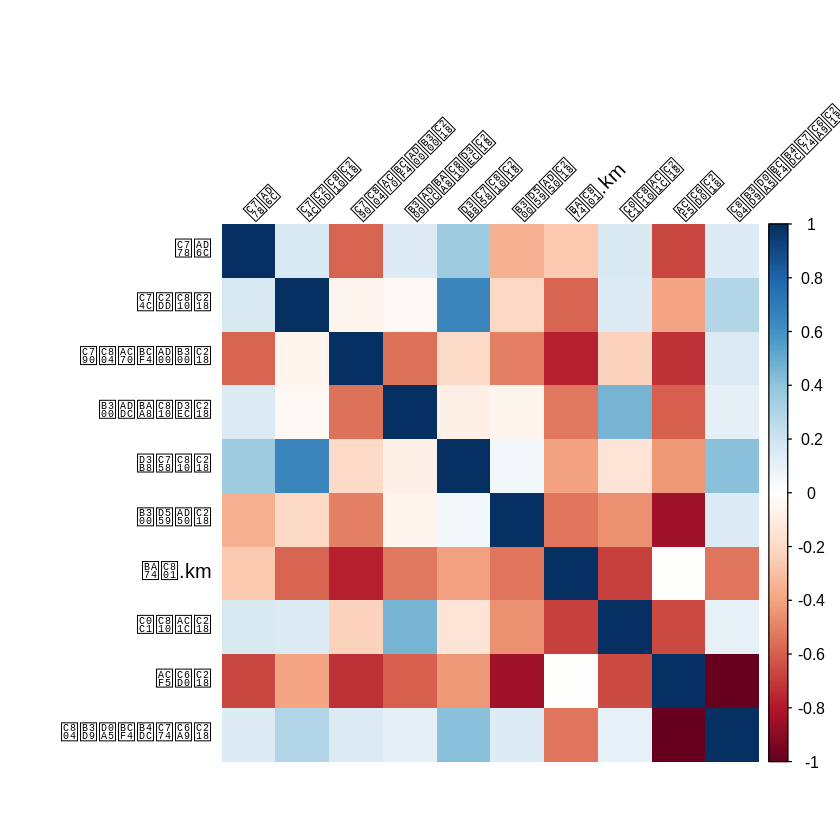

In [239]:
install.packages("corrplot")
library(corrplot)
cor.jj <- cor(jj) 
round(cor.jj, 2) 

corrplot(cor.jj, method='shade', shade.col=NA, tl.col='black', tl.srt=45)

## R 코드

In [ ]:


#################################################################################
#################################################################################
R 코드 ##########################################################################
#################################################################################
#################################################################################




pop <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/데이터_4차_행정동/(중복)2019_전주시 동별 인구.csv")
rest <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/데이터_4차_행정동/(중복)동별 음식점 및 주점업 사업체수(2018).csv")
bicycle <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/데이터_4차_행정동/(행정동)12_04_03_E_자전거보관소정보.csv")
bigstore <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/데이터_4차_행정동/(행정동)대규모점포현황_2020.csv")
cvstore <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/데이터_4차_행정동/(행정동)동별 체인화 편의점 + 사업체수 (2018년).csv")
univ <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/데이터_4차_행정동/(행정동)전주시 대학교.csv")
region <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/데이터_4차_행정동/(행정동)전주시 행정동 면적.csv")
store <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/전북 상권정보.csv")
bus <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/데이터_4차_행정동/전주시 버스 정류장.csv")

jjdong <- read.csv("C:/Users/WIN10/성민지/데이터_3차/데이터_3차/데이터_4차_행정동/전주 행정동_가나다순.csv")
jjdong <- jjdong$행정동
str(jjdong)
head(jjdong)

library(dplyr)


#################################################################################
인구수 ##########################################################################
#################################################################################

str(pop) ####
head(pop)

pop <- pop[,c(2,3)]
names(pop)[1] <- "행정동"
pop <- arrange(pop, pop$행정동)

table(pop$행정동 %in% jjdong)
table(jjdong %in% pop$행정동)
pop$행정동[pop$행정동 %in% jjdong == FALSE] #jjdong에는 없는 pop의 행정동
jjdong[jjdong %in% pop$행정동 == FALSE] #pop에는 없는 jjdong의 행정동

pop$행정동[which(pop$행정동 == "동산동")] <- "여의동" ## 19년 8월에 동산동을 여의동으로 변경, https://www.hani.co.kr/arti/area/honam/905848.html?_fr=mt2
pop <- arrange(pop, pop$행정동)

pop


#################################################################################
음식점수 ########################################################################
#################################################################################

str(rest)
head(rest)

rest <- rest[,c(2,4)]
names(rest) <- c("행정동", "음식점수")
rest <- arrange(rest, rest$행정동)

table(rest$행정동 %in% jjdong)
table(jjdong %in% rest$행정동)
jjdong[jjdong %in% rest$행정동 == FALSE]

rest


#################################################################################
자전거보관대수 ##################################################################
#################################################################################

str(bicycle)
head(bicycle)

bicycle <- bicycle[, c(1,5,8)]
bicycle <- bicycle %>% group_by(행정동) %>% summarise(자전거보관대수 = sum(보관대수))
bicycle <- as.data.frame(bicycle)
bicycle <- arrange(bicycle, bicycle$행정동)

table(bicycle$행정동 %in% jjdong)
table(jjdong %in% bicycle$행정동)
jjdong[jjdong %in% bicycle$행정동 == FALSE]

add <- data.frame(행정동 = jjdong[jjdong %in% bicycle$행정동 == FALSE], 
                     자전거보관대수 = rep(median(bicycle$자전거보관대수), times = length(jjdong[jjdong %in% bicycle$행정동 == FALSE])))
bicycle <- rbind(bicycle, add)
bicycle <- arrange(bicycle, bicycle$행정동)

bicycle


#################################################################################
대규모점포수 ####################################################################
#################################################################################

str(bigstore)
head(bigstore)

bigstore <- bigstore[,c(2,4,5)]
bigstore$count <- rep(1,nrow(bigstore))
bigstore <- bigstore %>% group_by(행정동) %>% summarise(대규모점포수 = sum(count))
bigstore <- as.data.frame(bigstore)
bigstore <- arrange(bigstore, bigstore$행정동)

table(bigstore$행정동 %in% jjdong)
table(jjdong %in% bigstore$행정동)
jjdong[jjdong %in% bigstore$행정동 == FALSE]

add <- data.frame(행정동 = jjdong[jjdong %in% bigstore$행정동 == FALSE], 
                  대규모점포수 = rep(0, length(jjdong[jjdong %in% bigstore$행정동 == FALSE])))
bigstore <- rbind(bigstore, add)
bigstore <- arrange(bigstore, bigstore$행정동)

bigstore


#################################################################################
편의점수 ########################################################################
#################################################################################

str(cvstore)
head(cvstore)

cvstore <- cvstore[,c(2,4)]
names(cvstore)[1] <- "행정동"
cvstore <- arrange(cvstore, cvstore$행정동)

table(cvstore$행정동 %in% jjdong)
table(jjdong %in% cvstore$행정동)
jjdong[jjdong %in% cvstore$행정동 == FALSE] #cvstore에는 없는 jjdong의 행정동

add <- data.frame(행정동 = jjdong[jjdong %in% cvstore$행정동 == FALSE], 
                     편의점수 = rep(median(cvstore$편의점수), length(jjdong[jjdong %in% cvstore$행정동 == FALSE])))
cvstore<- rbind(cvstore, add)
cvstore <- arrange(cvstore, cvstore$행정동)

cvstore


#################################################################################
대학교수 ########################################################################
#################################################################################

str(univ)
head(univ)

univ <- univ[,c(1,3)]
univ$count <- rep(1,nrow(univ))
univ <- univ %>% group_by(행정동) %>% summarise(대학교수 = sum(count))
univ <- as.data.frame(univ)
univ <- arrange(univ, univ$행정동)

table(univ$행정동 %in% jjdong)
table(jjdong %in% univ$행정동)
jjdong[jjdong %in% univ$행정동 == FALSE] #univ에는 없는 jjdong의 행정동

add <- data.frame(행정동 = jjdong[jjdong %in% univ$행정동 == FALSE], 대학교수 = rep(0, length(jjdong[jjdong %in% univ$행정동 == FALSE])))
univ <- rbind(univ, add)
univ <- arrange(univ, univ$행정동)

univ


#################################################################################
면적 ############################################################################
#################################################################################

str(region)
head(region)

region <- region[,c(2,3)]
names(region) <- c("행정동", "면적.km")
region <- arrange(region, region$행정동)

table(region$행정동 %in% jjdong)
table(jjdong %in% region$행정동)
region$행정동[region$행정동 %in% jjdong == FALSE] #jjdong에는 없는 region의 행정동 #이름 오류 있는 듯 (송청1동, 품남동)
jjdong[jjdong %in% region$행정동 == FALSE] #region에는 없는 jjdong의 행정동

region


#################################################################################
상점개수 ########################################################################
#################################################################################

str(store)
head(store)

store <- store[, c(1,2,5,7,9,11,13,15,17,19,32, 38,39)]

store <- store[grep("전주", store$시군구명), ]

store <- store %>% group_by(행정동명) %>% summarise(count = length(상가업소번호))
store <- store[-1,]
store <- as.data.frame(store)
store <- arrange(store, store$행정동명)

names(store) <- c("행정동", "상권개수")
table(store$행정동 %in% jjdong)
table(jjdong %in% store$행정동)
jjdong[jjdong %in% region$행정동 == FALSE] #region에는 없는 jjdong의 행정동

store$행정동[which(store$행정동 == "동산동")] <- "여의동"

store <- store %>% group_by(행정동) %>% summarise(상점개수 = sum(상권개수))
store <- as.data.frame(store)
store <- arrange(store, store$행정동명)

store


#################################################################################
상권지수 ########################################################################
#################################################################################

options(digits = 4)
상권지수 <- store$상점개수 / region$면적.km
상권지수


#################################################################################
버스정류장수 ####################################################################
#################################################################################

str(bus)
head(bus)


#################################################################################
공원수 ##########################################################################
#################################################################################

str(park)
head(park)

park <- park[, c(4,6,13)]
park$parkLoadAddr <- c("팔복동", "중앙동", "풍남동", "여의동", "여의동",
                       "우아2동", "송천2동", "송천2동", "우아2동", "팔복동")

park <- park %>% group_by(parkLoadAddr) %>% summarise(공원수 = length(dataTitle))
park <- as.data.frame(park)
names(park)[1] <- "행정동"
park <- arrange(park, park$행정동)

table(jjdong %in% park$행정동)
jjdong[jjdong %in% park$행정동 == FALSE] #park에는 없는 jjdong의 행정동

add <- data.frame(행정동 = jjdong[jjdong %in% park$행정동 == FALSE], 
                     공원수 = rep(0, length(jjdong[jjdong %in% park$행정동 == FALSE])))
park <- rbind(park, add)
park <- arrange(park, park$행정동)

park



#################################################################################
전동킥보드 이용 수 ##############################################################
#################################################################################

str(scooter)
head(scooter)

scooter <- scooter[, c(2,6)]
names(scooter) <- c("행정동", "전동킥보드이용수")
scooter <- arrange(scooter, scooter$행정동)

table(jjdong %in% scooter$행정동)

scooter


#################################################################################
누락된 행정동 없는지 확인하기 ###################################################
#################################################################################

df <- data.frame(pop = pop$행정동, rest = rest$행정동, bicycle = bicycle$행정동, bigstore = bigstore$행정동, 
                 cvstore = cvstore$행정동, univ = univ$행정동, region = region$행정동, store = store$행정동, 
                 park = park$행정동, scooter = scooter$행정동)
df



#################################################################################
정리한 데이터 합쳐서 jj로 정리하기 ##############################################
#################################################################################

jj <- merge(pop, rest)
jj <- merge(jj, bicycle)
jj <- merge(jj, bigstore)
jj <- merge(jj, cvstore)
jj <- merge(jj, univ)
jj <- merge(jj, region)
jj <- merge(jj, store)
jj <- cbind(jj, 상권지수)
jj <- merge(jj, park)
jj <- merge(jj, scooter)
jj

#################################################################################
jj를 csv 파일로 저장 #############################################################
#################################################################################

write.csv(jj, file = 'jj.csv')




jj <- jj[,-1] #행정동은 상관분석 불가능하므로 제외



#################################################################################
상관분석 ########################################################################
#################################################################################

library(corrplot) 
cor.jj <- cor(jj) 
round(cor.jj, 2) 
corrplot(cor.jj, method='number', shade.col=NA, tl.col='black', tl.srt=45)
